https://github.com/patrickloeber/python-engineer-notebooks/blob/master/advanced-python/18-Functions%20arguments.ipynb

Function arguments
In this article we will talk about function parameters and function arguments in detail. We will learn:

The difference between arguments and parameters
Positional and keyword arguments
Default arguments
Variable-length arguments (*args and **kwargs)
Container unpacking into function arguments
Local vs. global arguments
Parameter passing (by value or by reference?)
Arguments and parameters
Parameters are the variables that are defined or used inside parentheses while defining a function
Arguments are the value passed for these parameters while calling a function

In [1]:
def print_name(name): # name is the parameter
    print(name)

print_name('Alex') # 'Alex' is the argument

Alex


Positional and keyword arguments
We can pass arguments as positional or keyword arguments. Some benefits of keyword arguments can be:

We can call arguments by their names to make it more clear what they represent
We can rearrange arguments in a way that makes them most readable

In [2]:
def foo(a, b, c):
    print(a, b, c)
    
# positional arguments
foo(1, 2, 3)

# keyword arguments
foo(a=1, b=2, c=3)
foo(c=3, b=2, a=1) # Note that the order is not important here

# mix of both
foo(1, b=2, c=3)

# This is not allowed:
# foo(1, b=2, 3) # positional argument after keyword argument
# foo(1, b=2, a=3) # multiple values for argument 'a'

1 2 3
1 2 3
1 2 3
1 2 3


Default arguments
Functions can have default arguments with a predefined value. This argument can be left out and the default value is then passed to the function, or the argument can be used with a different value. Note that default arguments must be defined as the last parameters in a function.

In [3]:
# default arguments
def foo(a, b, c, d=4):
    print(a, b, c, d)

foo(1, 2, 3, 4)
foo(1, b=2, c=3, d=100)

# not allowed: default arguments must be at the end
# def foo(a, b=2, c, d=4):
#     print(a, b, c, d)

1 2 3 4
1 2 3 100


Variable-length arguments (*args and **kwargs)
If you mark a parameter with one asterisk (*), you can pass any number of positional arguments to your function (Typically called *args)
If you mark a parameter with two asterisks (**), you can pass any number of keyword arguments to this function (Typically called **kwargs).

In [4]:
def foo(a, b, *args, **kwargs):
    print(a, b)
    for arg in args:
        print(arg)
    for kwarg in kwargs:
        print(kwarg, kwargs[kwarg])

# 3, 4, 5 are combined into args
# six and seven are combined into kwargs
foo(1, 2, 3, 4, 5, six=6, seven=7)
print()

# omitting of args or kwargs is also possible
foo(1, 2, three=3)

1 2
3
4
5
six 6
seven 7

1 2
three 3


Forced keyword arguments
Sometimes you want to have keyword-only arguments. You can enforce that with:

If you write '*,' in your function parameter list, all parameters after that must be passed as keyword arguments.
Arguments after variable-length arguments must be keyword arguments.

In [5]:
def foo(a, b, *, c, d):
    print(a, b, c, d)

foo(1, 2, c=3, d=4)
# not allowed:
# foo(1, 2, 3, 4)

# arguments after variable-length arguments must be keyword arguments
def foo(*args, last):
    for arg in args:
        print(arg)
    print(last)

foo(8, 9, 10, last=50)

1 2 3 4
8
9
10
50


Unpacking into agruments
Lists or tuples can be unpacked into arguments with one asterisk (*) if the length of the container matches the number of function parameters.
Dictionaries can be unpacked into arguments with two asterisks (**) if the length and the keys match the function parameters.

In [6]:
def foo(a, b, c):
    print(a, b, c)


# list/tuple unpacking, length must match
my_list = [4, 5, 6] # or tuple
foo(*my_list)

# dict unpacking, keys and length must match
my_dict = {'a': 1, 'b': 2, 'c': 3}
foo(**my_dict)

# my_dict = {'a': 1, 'b': 2, 'd': 3} # not possible since wrong keyword

4 5 6
1 2 3


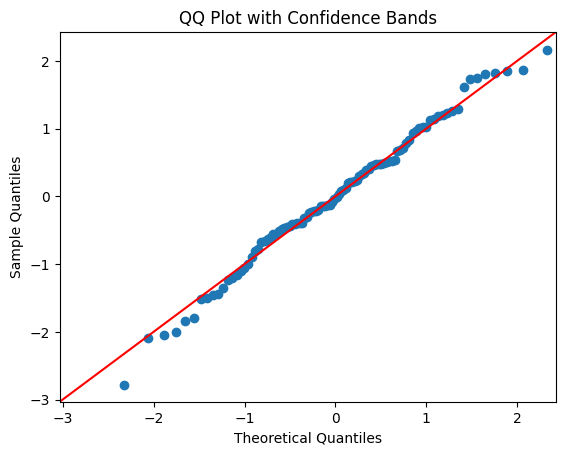

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Generate a sample dataset (replace this with your data)
np.random.seed(42)
sample_data = np.random.normal(loc=0, scale=1, size=100)

# Create a QQ plot
qqplot = sm.qqplot(sample_data, line='45', fit=True)

# Customize the plot
plt.title("QQ Plot with Confidence Bands")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")

# Display the plot
qqplot.show()


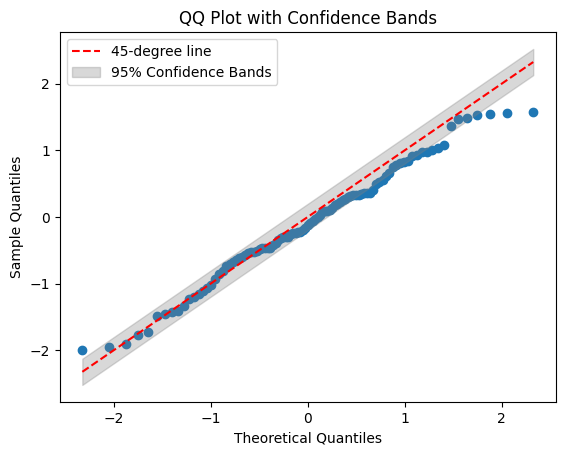

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Generate a sample dataset (replace this with your data)
np.random.seed(42)
sample_data = np.random.normal(loc=0, scale=1, size=100)

# Calculate quantiles for the sample data
sample_quantiles = np.percentile(sample_data, np.arange(1, 100))

# Calculate quantiles for a theoretical distribution (e.g., normal distribution)
theoretical_quantiles = stats.norm.ppf(np.arange(1, 100) / 100)

# Calculate confidence bands for the theoretical quantiles
conf_bands = 1.96 / np.sqrt(sample_quantiles.size)  # 95% confidence bands

# Create a QQ plot with confidence bands
plt.scatter(theoretical_quantiles, sample_quantiles)
plt.plot(theoretical_quantiles, theoretical_quantiles, color='red', linestyle='--', label='45-degree line')
plt.fill_between(theoretical_quantiles, theoretical_quantiles - conf_bands, theoretical_quantiles + conf_bands, color='gray', alpha=0.3, label='95% Confidence Bands')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.title("QQ Plot with Confidence Bands")
plt.legend()
plt.show()